# Analysis of Covid-19 NYC data
Looking at waves.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

NEW_COVID_CASE_COUNT  PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                                              
2020-02-29                           1                    0   
2020-03-01                           0                    0   
2020-03-02                           0                    0   
2020-03-03                           1                    0   
2020-03-04                           5                    0   

                  HOSPITALIZED_COUNT  DEATH_COUNT  PROBABLE_DEATH_COUNT  \
DATE_OF_INTEREST                                                          
2020-02-29                         1            0                     0   
2020-03-01                         1            0                     0   
2020-03-02                         2            0                     0   
2020-03-03                         7            0                     0   
2020-03-04                         2            0                     0   

                  CASE_COUNT_7DAY_AVG  ALL_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                 
2020-02-29                          0                        0   
2020-03-01                          0                        0   
2020-03-02                          0                        0   
2020-03-03                          0                        0   
2020-03-04                          0                        0   

                  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                              
2020-02-29                          0                     0   
2020-03-01                          0                     0   
2020-03-02                          0                     0   
2020-03-03                          0                     0   
2020-03-04                          0                     0   

                  ALL_DEATH_COUNT_7DAY_AVG  ...  SI_PROBABLE_CASE_COUNT  \
DATE_OF_INTEREST                            ...                           
2020-02-29                               0  ...                       0   
2020-03-01                               0  ...                       0   
2020-03-02                               0  ...                       0   
2020-03-03                               0  ...                       0   
2020-03-04                               0  ...                       0   

                  SI_HOSPITALIZED_COUNT  SI_DEATH_COUNT  \
DATE_OF_INTEREST                                          
2020-02-29                            0               0   
2020-03-01                            0               0   
2020-03-02                            0               0   
2020-03-03                            0               0   
2020-03-04                            0               0   

                  SI_PROBABLE_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                    
2020-02-29                              0                       0   
2020-03-01                              0                       0   
2020-03-02                              0                       0   
2020-03-03                              0                       0   
2020-03-04                              0                       0   

                  SI_ALL_CASE_COUNT_7DAY_AVG  SI_HOSPITALIZED_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                               
2020-02-29                                 0                               0   
2020-03-01                                 0                               0   
2020-03-02                                 0                               0   
2020-03-03                                 0                               0   
2020-03-04                                 0                               0   

                  SI_DEATH_COUNT_7DAY_AVG  SI_ALL_DEATH_COUNT_7DAY_AVG  \
DATE_OF_INTEREST                                                         
2020-02-29  

# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

In [5]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

## Full history
Note that the 7 day rolling average clearly shows the trends

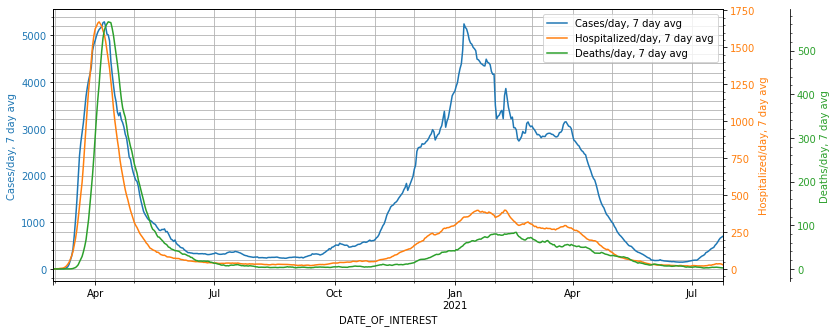

In [6]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                  "Hospitalized/day, 7 day avg",
                  "Deaths/day, 7 day avg"]],
             figsize=(12, 5))

## First wave

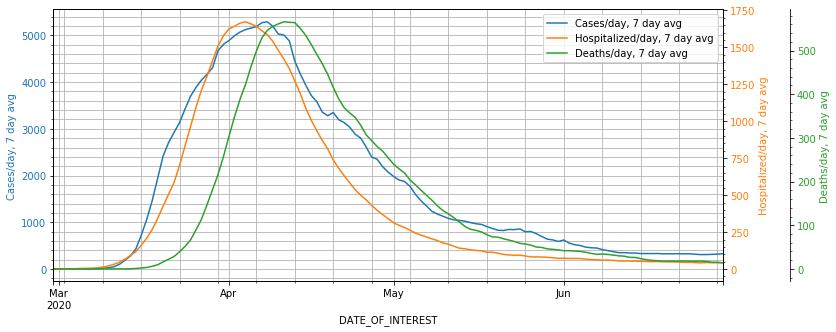

In [7]:
end = "2020-07-01"
period = dat[dat.index < end]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave

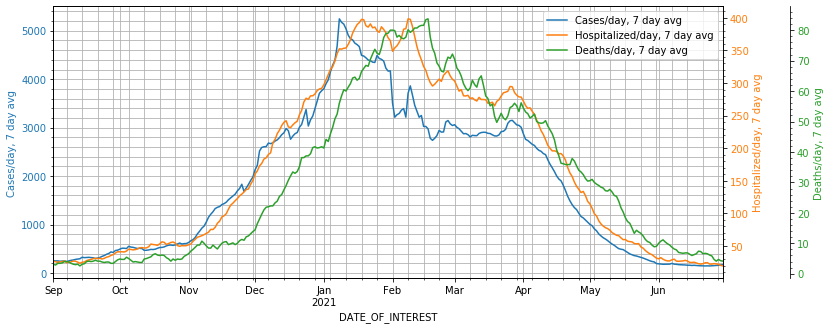

In [8]:
start = "2020-09-01"
end = "2021-07-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Third wave

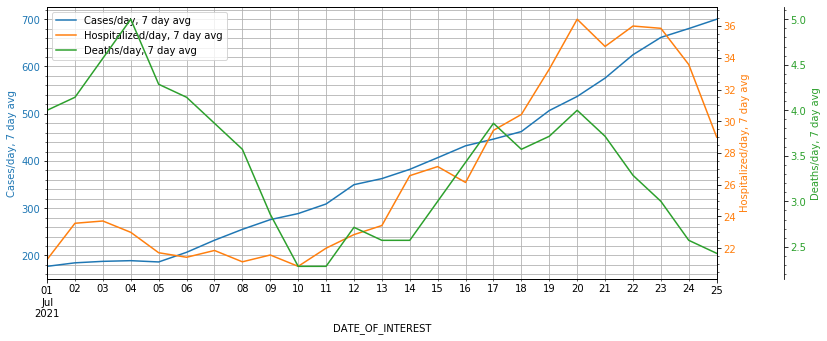

In [9]:
start = "2021-07-01"
period = dat[(dat.index >= start)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Peak analysis

## First wave
Oddly, cases/day peaked after hospitalized/day.  Cases/day peak is 4 days *after* hospitalized/day peak.  Deaths/day peak is 3 days later.

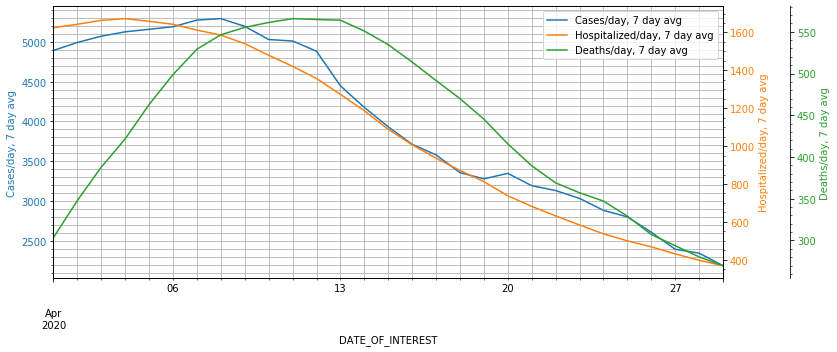

In [10]:
start = "2020-04-01"
end = "2020-04-30"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Second wave
Delays are different.  Peak hospitalized/day is 10 days after peak cases/day.  Peak deaths/day is ~Feb 16, vs Jan 8, about 39 days. 

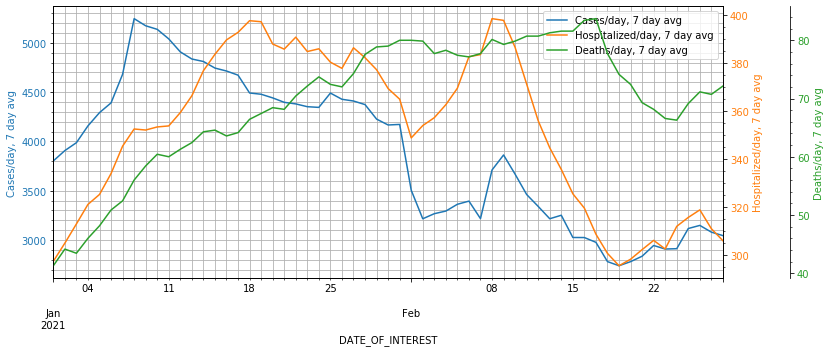

In [11]:
start = "2021-01-01"
end = "2021-03-01"
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Rates
Looking at rates per case, but with shifts to account for delays

In [12]:
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"]

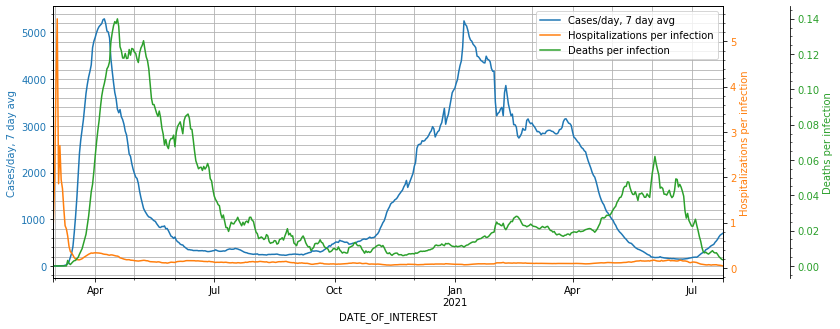

In [13]:
u.plot_multi(dat[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

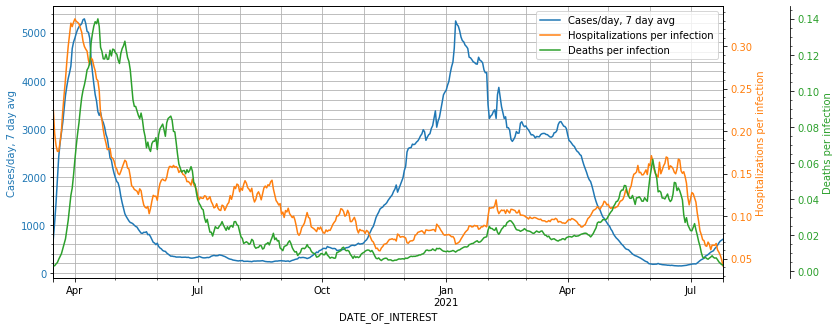

In [14]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 7 day shift

In [15]:
shift = 7
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

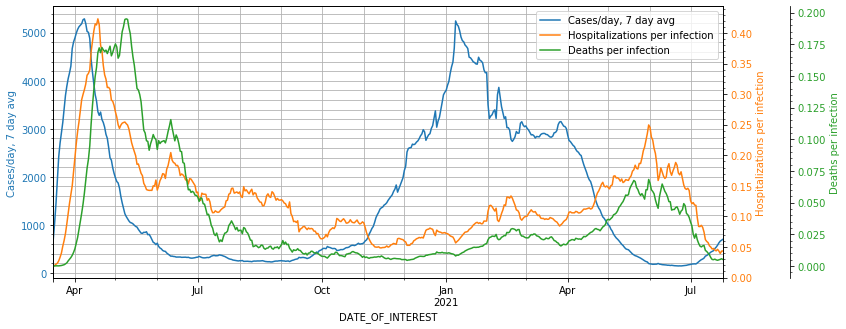

In [16]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## 14 day shift

In [17]:
shift = 14
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]

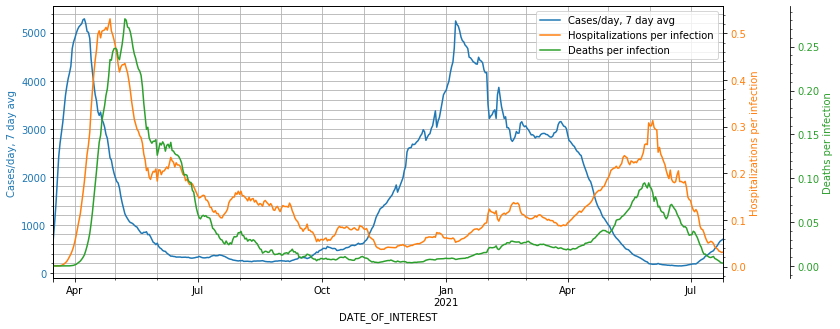

In [18]:
start = "2020/03/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

## Lots of shifts

Rates shifted by -30 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      467.000000   
mean            1601.712849                        0.110412   
std             1501.722421                        0.098434   
min              145.285714                        0.028882   
25%              324.571429                        0.062974   
50%              823.142857                        0.098170   
75%             2878.428571                        0.132887   
max             5290.285714                        1.525020   

       Deaths per infection  
count            467.000000  
mean               0.024194  
std                0.046358  
min                0.008396  
25%                0.014786  
50%                0.018449  
75%                0.022022  
max                0.748999

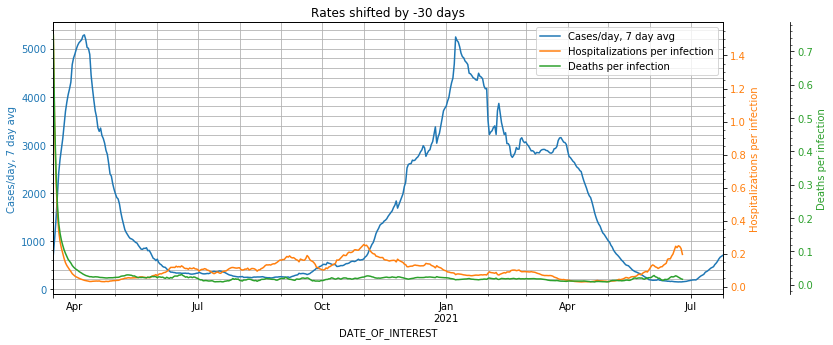

Rates shifted by -29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      468.000000   
mean            1601.712849                        0.111123   
std             1501.722421                        0.104371   
min              145.285714                        0.030181   
25%              324.571429                        0.063768   
50%              823.142857                        0.098712   
75%             2878.428571                        0.131446   
max             5290.285714                        1.662730   

       Deaths per infection  
count            468.000000  
mean               0.024670  
std                0.048120  
min                0.008745  
25%                0.014933  
50%                0.018599  
75%                0.022078  
max                0.771817

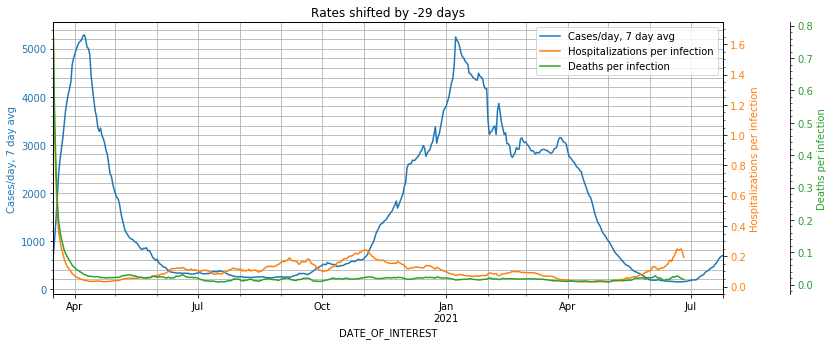

Rates shifted by -28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      469.000000   
mean            1601.712849                        0.111914   
std             1501.722421                        0.110490   
min              145.285714                        0.031396   
25%              324.571429                        0.066270   
50%              823.142857                        0.098653   
75%             2878.428571                        0.131450   
max             5290.285714                        1.783627   

       Deaths per infection  
count            469.000000  
mean               0.025147  
std                0.049635  
min                0.008720  
25%                0.014965  
50%                0.018527  
75%                0.022489  
max                0.790032

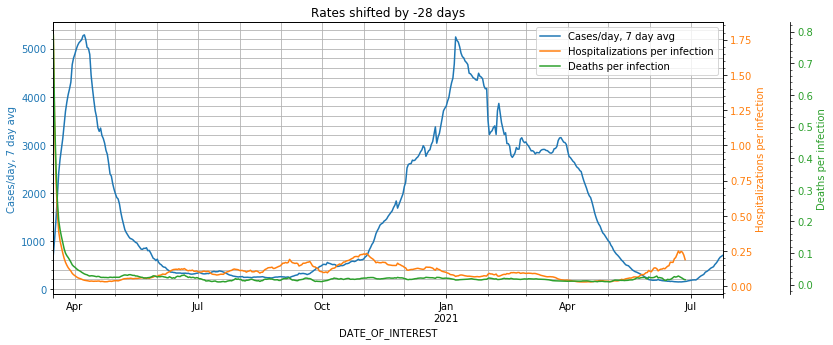

Rates shifted by -27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      470.000000   
mean            1601.712849                        0.112757   
std             1501.722421                        0.116712   
min              145.285714                        0.031981   
25%              324.571429                        0.067425   
50%              823.142857                        0.098888   
75%             2878.428571                        0.130493   
max             5290.285714                        1.901121   

       Deaths per infection  
count            470.000000  
mean               0.025593  
std                0.050489  
min                0.008365  
25%                0.015087  
50%                0.018481  
75%                0.022680  
max                0.791233

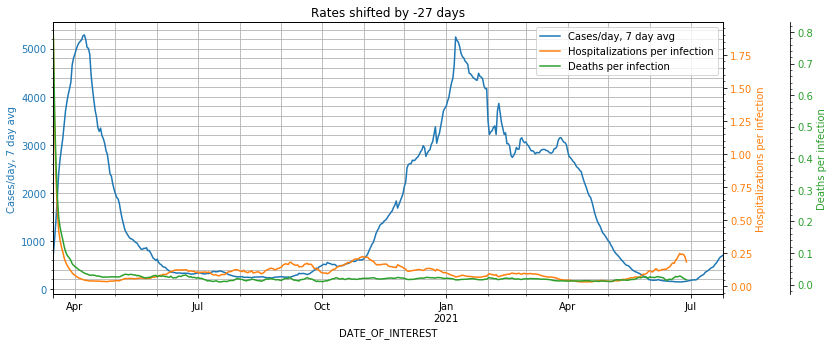

Rates shifted by -26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      471.000000   
mean            1601.712849                        0.113588   
std             1501.722421                        0.122186   
min              145.285714                        0.032975   
25%              324.571429                        0.068296   
50%              823.142857                        0.098209   
75%             2878.428571                        0.129304   
max             5290.285714                        1.990993   

       Deaths per infection  
count            471.000000  
mean               0.026022  
std                0.051064  
min                0.008504  
25%                0.015329  
50%                0.018496  
75%                0.022938  
max                0.792634

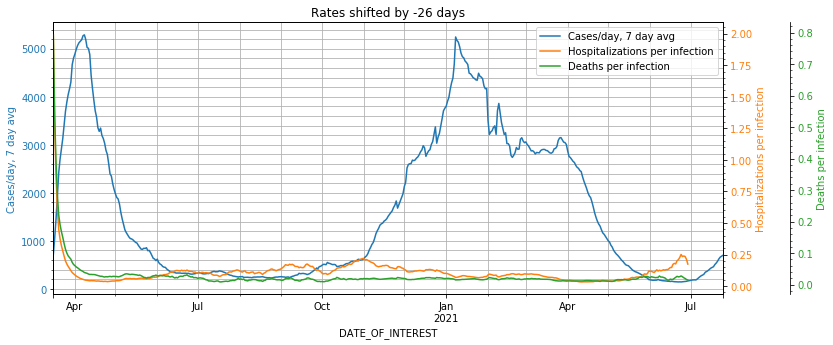

Rates shifted by -25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      472.000000   
mean            1601.712849                        0.114420   
std             1501.722421                        0.127176   
min              145.285714                        0.034319   
25%              324.571429                        0.068959   
50%              823.142857                        0.098837   
75%             2878.428571                        0.128113   
max             5290.285714                        2.073058   

       Deaths per infection  
count            472.000000  
mean               0.026427  
std                0.051257  
min                0.008661  
25%                0.015419  
50%                0.018210  
75%                0.023267  
max                0.786229

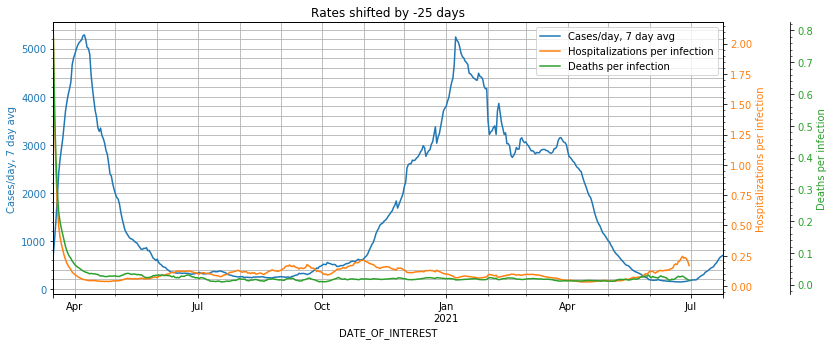

Rates shifted by -24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      473.000000   
mean            1601.712849                        0.115272   
std             1501.722421                        0.132131   
min              145.285714                        0.035862   
25%              324.571429                        0.069342   
50%              823.142857                        0.100203   
75%             2878.428571                        0.128234   
max             5290.285714                        2.158727   

       Deaths per infection  
count            473.000000  
mean               0.026818  
std                0.051220  
min                0.008664  
25%                0.015460  
50%                0.017972  
75%                0.023788  
max                0.778022

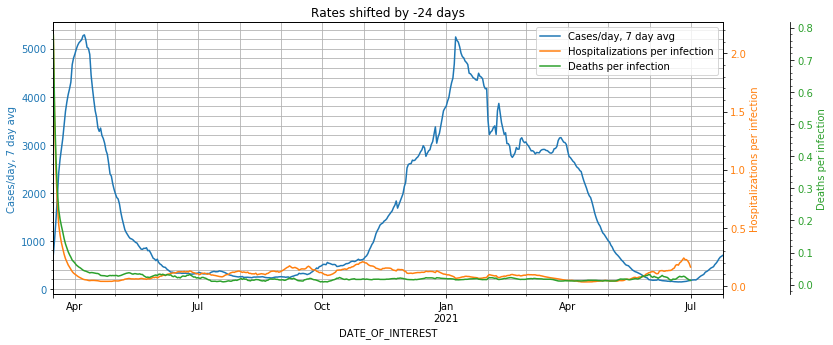

Rates shifted by -23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      474.000000   
mean            1601.712849                        0.116113   
std             1501.722421                        0.136399   
min              145.285714                        0.037083   
25%              324.571429                        0.070334   
50%              823.142857                        0.100897   
75%             2878.428571                        0.128678   
max             5290.285714                        2.222178   

       Deaths per infection  
count            474.000000  
mean               0.027190  
std                0.050938  
min                0.008435  
25%                0.015369  
50%                0.017980  
75%                0.023671  
max                0.765612

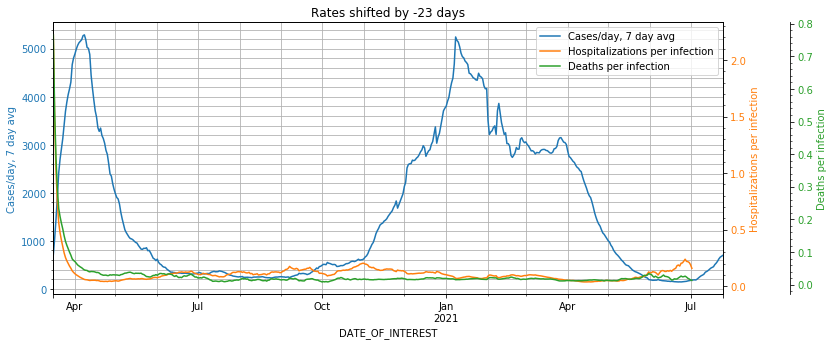

Rates shifted by -22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      475.000000   
mean            1601.712849                        0.116905   
std             1501.722421                        0.139554   
min              145.285714                        0.038477   
25%              324.571429                        0.071195   
50%              823.142857                        0.100779   
75%             2878.428571                        0.127826   
max             5290.285714                        2.259408   

       Deaths per infection  
count            475.000000  
mean               0.027527  
std                0.050180  
min                0.008105  
25%                0.015189  
50%                0.017913  
75%                0.024231  
max                0.741393

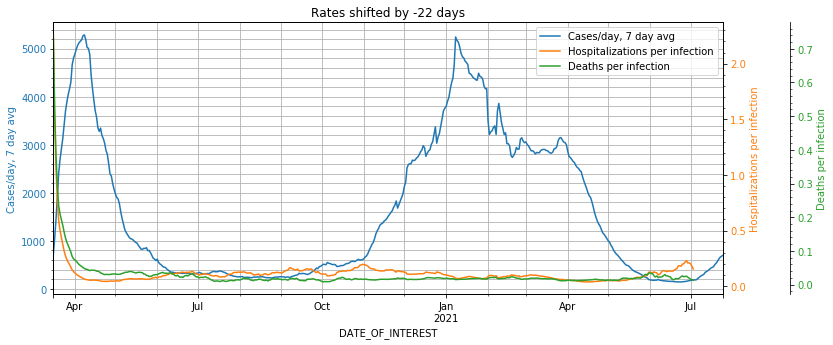

Rates shifted by -21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      476.000000   
mean            1601.712849                        0.117691   
std             1501.722421                        0.142416   
min              145.285714                        0.040046   
25%              324.571429                        0.072124   
50%              823.142857                        0.102645   
75%             2878.428571                        0.126866   
max             5290.285714                        2.302042   

       Deaths per infection  
count            476.000000  
mean               0.027802  
std                0.048661  
min                0.008037  
25%                0.015181  
50%                0.017859  
75%                0.024250  
max                0.698759

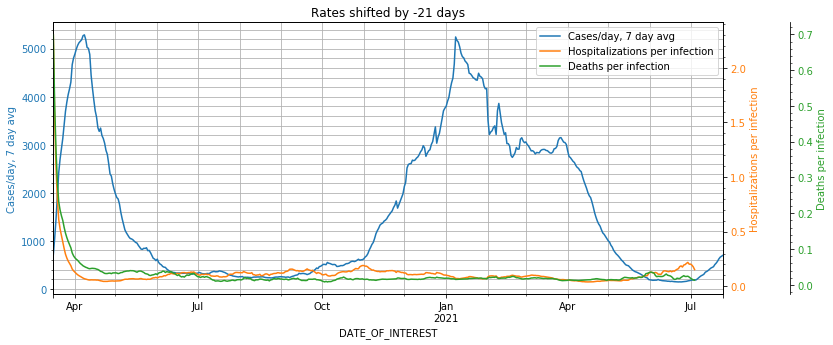

Rates shifted by -20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      477.000000   
mean            1601.712849                        0.118461   
std             1501.722421                        0.144497   
min              145.285714                        0.041094   
25%              324.571429                        0.073161   
50%              823.142857                        0.102571   
75%             2878.428571                        0.126531   
max             5290.285714                        2.324259   

       Deaths per infection  
count            477.000000  
mean               0.028026  
std                0.046592  
min                0.008218  
25%                0.015052  
50%                0.017894  
75%                0.024943  
max                0.648519

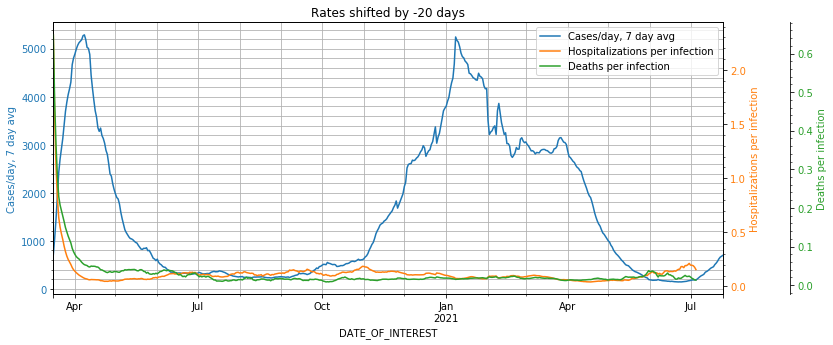

Rates shifted by -19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      478.000000   
mean            1601.712849                        0.119202   
std             1501.722421                        0.146160   
min              145.285714                        0.042371   
25%              324.571429                        0.075037   
50%              823.142857                        0.104123   
75%             2878.428571                        0.125750   
max             5290.285714                        2.343875   

       Deaths per infection  
count            478.000000  
mean               0.028199  
std                0.044081  
min                0.007519  
25%                0.014898  
50%                0.017939  
75%                0.024977  
max                0.590873

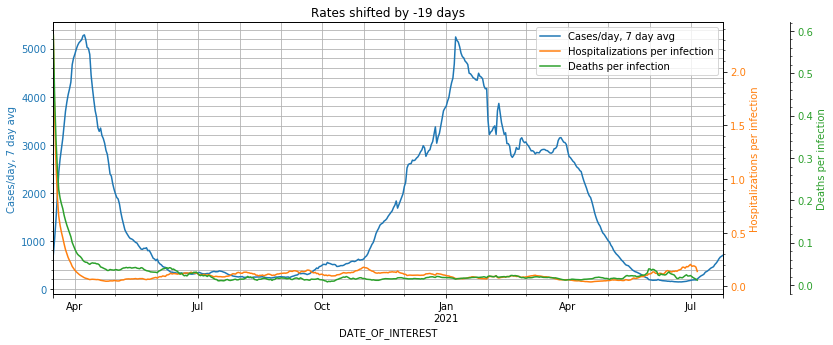

Rates shifted by -18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      479.000000   
mean            1601.712849                        0.119861   
std             1501.722421                        0.146611   
min              145.285714                        0.044099   
25%              324.571429                        0.076623   
50%              823.142857                        0.103286   
75%             2878.428571                        0.124805   
max             5290.285714                        2.331465   

       Deaths per infection  
count            479.000000  
mean               0.028357  
std                0.041655  
min                0.007750  
25%                0.014744  
50%                0.017906  
75%                0.025857  
max                0.543435

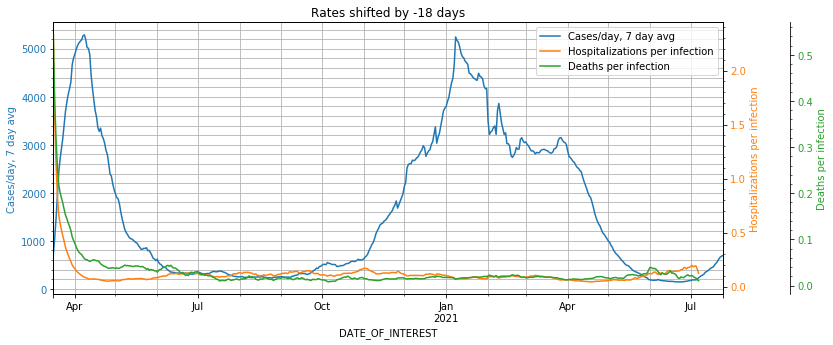

Rates shifted by -17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      480.000000   
mean            1601.712849                        0.120438   
std             1501.722421                        0.145994   
min              145.285714                        0.046348   
25%              324.571429                        0.078552   
50%              823.142857                        0.103262   
75%             2878.428571                        0.123512   
max             5290.285714                        2.302242   

       Deaths per infection  
count            480.000000  
mean               0.028485  
std                0.039073  
min                0.007838  
25%                0.014633  
50%                0.017944  
75%                0.026601  
max                0.487390

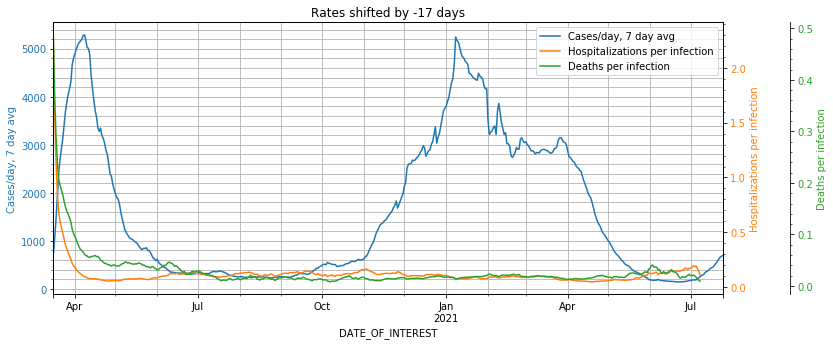

Rates shifted by -16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      481.000000   
mean            1601.712849                        0.120978   
std             1501.722421                        0.144997   
min              145.285714                        0.049033   
25%              324.571429                        0.080993   
50%              823.142857                        0.103280   
75%             2878.428571                        0.123425   
max             5290.285714                        2.277022   

       Deaths per infection  
count            481.000000  
mean               0.028585  
std                0.036332  
min                0.008035  
25%                0.014617  
50%                0.018041  
75%                0.027363  
max                0.425140

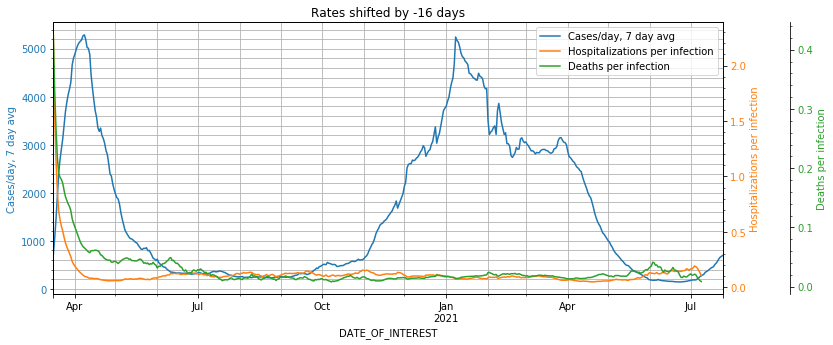

Rates shifted by -15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      482.000000   
mean            1601.712849                        0.121431   
std             1501.722421                        0.142592   
min              145.285714                        0.052163   
25%              324.571429                        0.083421   
50%              823.142857                        0.103261   
75%             2878.428571                        0.122510   
max             5290.285714                        2.212370   

       Deaths per infection  
count            482.000000  
mean               0.028658  
std                0.033560  
min                0.008201  
25%                0.014445  
50%                0.018291  
75%                0.028143  
max                0.360488

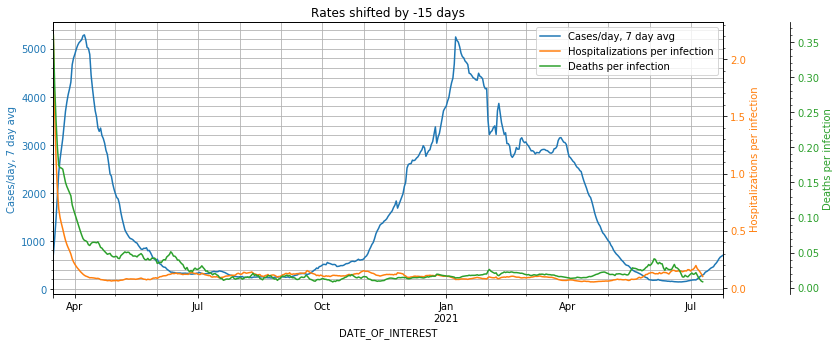

Rates shifted by -14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      483.000000   
mean            1601.712849                        0.121765   
std             1501.722421                        0.138577   
min              145.285714                        0.054955   
25%              324.571429                        0.084937   
50%              823.142857                        0.102333   
75%             2878.428571                        0.122360   
max             5290.285714                        2.115292   

       Deaths per infection  
count            483.000000  
mean               0.028725  
std                0.031033  
min                0.007859  
25%                0.014403  
50%                0.018295  
75%                0.028518  
max                0.302442

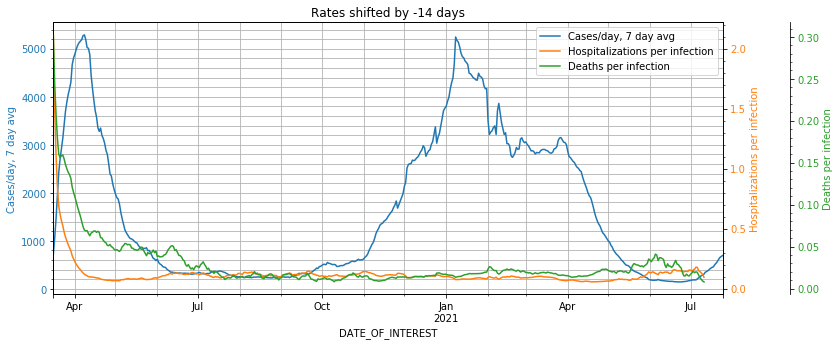

Rates shifted by -13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      484.000000   
mean            1601.712849                        0.121925   
std             1501.722421                        0.132534   
min              145.285714                        0.058463   
25%              324.571429                        0.085388   
50%              823.142857                        0.101868   
75%             2878.428571                        0.121685   
max             5290.285714                        1.974179   

       Deaths per infection  
count            484.000000  
mean               0.028804  
std                0.028929  
min                0.006942  
25%                0.014361  
50%                0.018230  
75%                0.029416  
max                0.253803

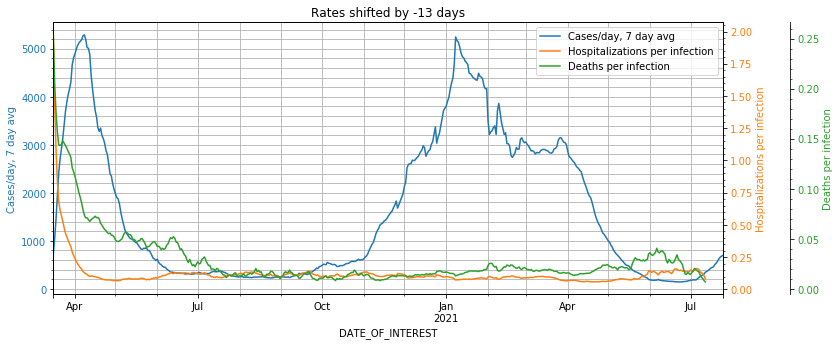

Rates shifted by -12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      485.000000   
mean            1601.712849                        0.121973   
std             1501.722421                        0.125450   
min              145.285714                        0.061619   
25%              324.571429                        0.087470   
50%              823.142857                        0.102012   
75%             2878.428571                        0.121628   
max             5290.285714                        1.828863   

       Deaths per infection  
count            485.000000  
mean               0.028896  
std                0.027195  
min                0.006696  
25%                0.014239  
50%                0.018171  
75%                0.030612  
max                0.205564

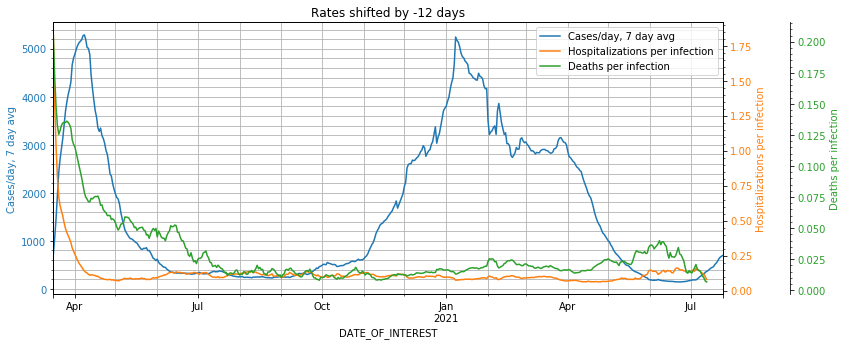

Rates shifted by -11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      486.000000   
mean            1601.712849                        0.121980   
std             1501.722421                        0.118294   
min              145.285714                        0.064132   
25%              324.571429                        0.088973   
50%              823.142857                        0.101367   
75%             2878.428571                        0.120736   
max             5290.285714                        1.698759   

       Deaths per infection  
count            486.000000  
mean               0.029003  
std                0.025858  
min                0.006353  
25%                0.014197  
50%                0.018277  
75%                0.032253  
max                0.159728

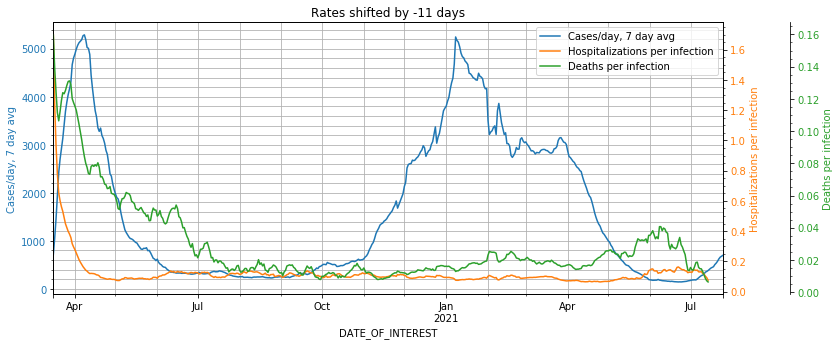

Rates shifted by -10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      487.000000   
mean            1601.712849                        0.121898   
std             1501.722421                        0.110190   
min              145.285714                        0.067608   
25%              324.571429                        0.090771   
50%              823.142857                        0.100315   
75%             2878.428571                        0.121540   
max             5290.285714                        1.534428   

       Deaths per infection  
count            487.000000  
mean               0.029148  
std                0.025014  
min                0.005967  
25%                0.013913  
50%                0.018346  
75%                0.034032  
max                0.127010

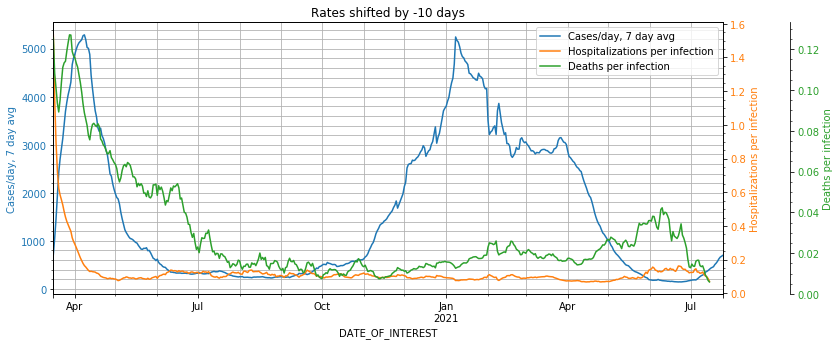

Rates shifted by -9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      488.000000   
mean            1601.712849                        0.121721   
std             1501.722421                        0.101274   
min              145.285714                        0.067107   
25%              324.571429                        0.091062   
50%              823.142857                        0.099966   
75%             2878.428571                        0.121906   
max             5290.285714                        1.352082   

       Deaths per infection  
count            488.000000  
mean               0.029323  
std                0.024573  
min                0.005620  
25%                0.013862  
50%                0.018660  
75%                0.035214  
max                0.122881

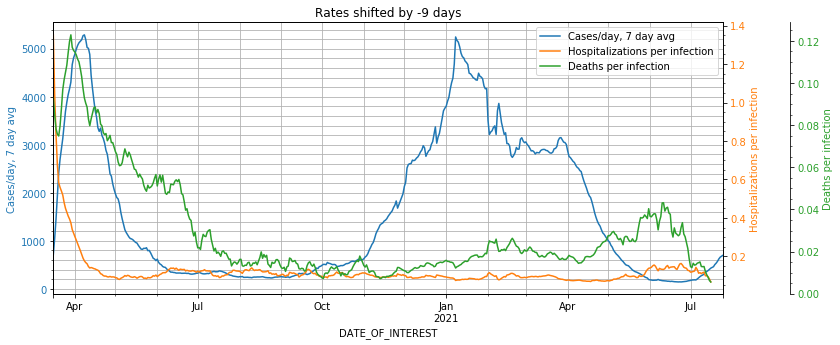

Rates shifted by -8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      489.000000   
mean            1601.712849                        0.121477   
std             1501.722421                        0.092063   
min              145.285714                        0.064981   
25%              324.571429                        0.090900   
50%              823.142857                        0.100802   
75%             2878.428571                        0.122391   
max             5290.285714                        1.167534   

       Deaths per infection  
count            489.000000  
mean               0.029549  
std                0.024530  
min                0.005442  
25%                0.013810  
50%                0.019133  
75%                0.036212  
max                0.115815

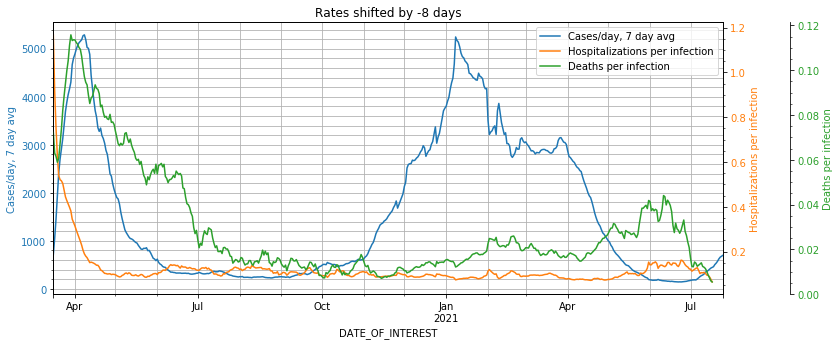

Rates shifted by -7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      490.000000   
mean            1601.712849                        0.121195   
std             1501.722421                        0.082943   
min              145.285714                        0.062732   
25%              324.571429                        0.090414   
50%              823.142857                        0.102144   
75%             2878.428571                        0.122271   
max             5290.285714                        0.982786   

       Deaths per infection  
count            490.000000  
mean               0.029826  
std                0.024803  
min                0.005253  
25%                0.013572  
50%                0.019384  
75%                0.036803  
max                0.111721

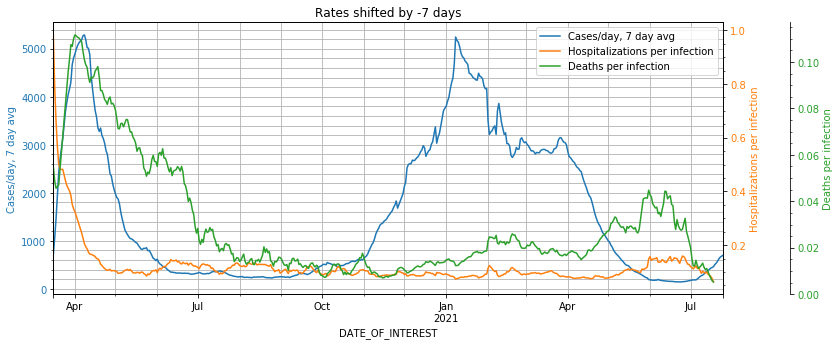

Rates shifted by -6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      491.000000   
mean            1601.712849                        0.120925   
std             1501.722421                        0.074694   
min              145.285714                        0.057231   
25%              324.571429                        0.089302   
50%              823.142857                        0.102464   
75%             2878.428571                        0.122886   
max             5290.285714                        0.821857   

       Deaths per infection  
count            491.000000  
mean               0.030152  
std                0.025339  
min                0.004793  
25%                0.013211  
50%                0.019523  
75%                0.036288  
max                0.109704

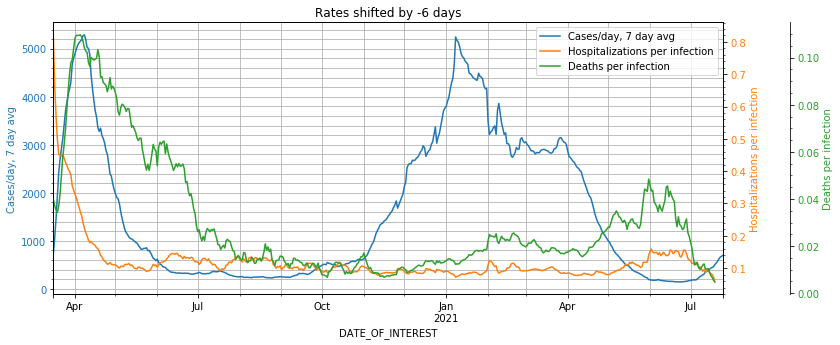

Rates shifted by -5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      492.000000   
mean            1601.712849                        0.120780   
std             1501.722421                        0.068138   
min              145.285714                        0.054047   
25%              324.571429                        0.088573   
50%              823.142857                        0.102817   
75%             2878.428571                        0.124683   
max             5290.285714                        0.710168   

       Deaths per infection  
count            492.000000  
mean               0.030530  
std                0.026081  
min                0.004526  
25%                0.013088  
50%                0.019962  
75%                0.035820  
max                0.109031

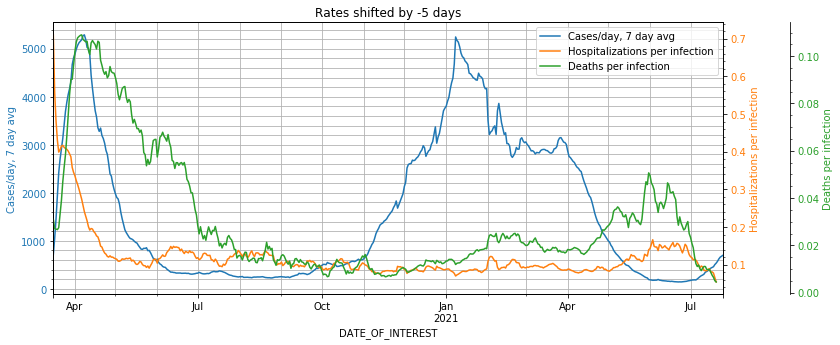

Rates shifted by -4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      493.000000   
mean            1601.712849                        0.120720   
std             1501.722421                        0.062709   
min              145.285714                        0.050397   
25%              324.571429                        0.088862   
50%              823.142857                        0.102744   
75%             2878.428571                        0.127124   
max             5290.285714                        0.597078   

       Deaths per infection  
count            493.000000  
mean               0.030954  
std                0.026996  
min                0.004220  
25%                0.012878  
50%                0.020226  
75%                0.036776  
max                0.113205

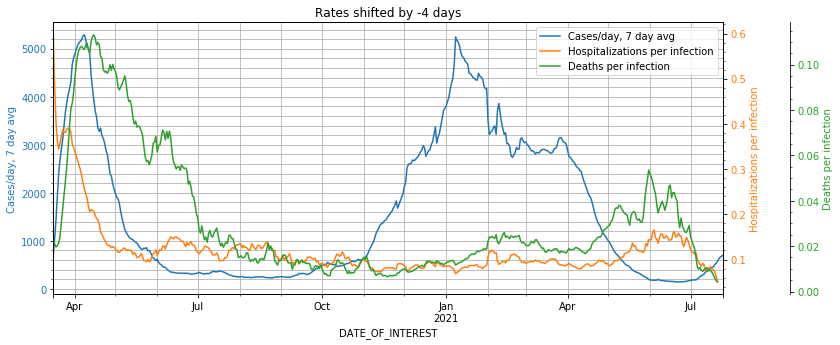

Rates shifted by -3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      494.000000   
mean            1601.712849                        0.120711   
std             1501.722421                        0.058225   
min              145.285714                        0.046411   
25%              324.571429                        0.088662   
50%              823.142857                        0.102597   
75%             2878.428571                        0.129899   
max             5290.285714                        0.478383   

       Deaths per infection  
count            494.000000  
mean               0.031416  
std                0.028069  
min                0.003887  
25%                0.012774  
50%                0.020004  
75%                0.038011  
max                0.119922

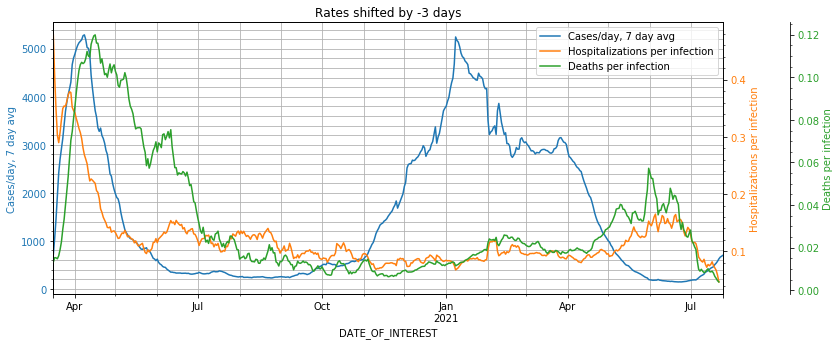

Rates shifted by -2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      495.000000   
mean            1601.712849                        0.120786   
std             1501.722421                        0.054981   
min              145.285714                        0.043835   
25%              324.571429                        0.088378   
50%              823.142857                        0.104619   
75%             2878.428571                        0.132749   
max             5290.285714                        0.373899   

       Deaths per infection  
count            495.000000  
mean               0.031925  
std                0.029271  
min                0.003671  
25%                0.012354  
50%                0.020706  
75%                0.038966  
max                0.126539

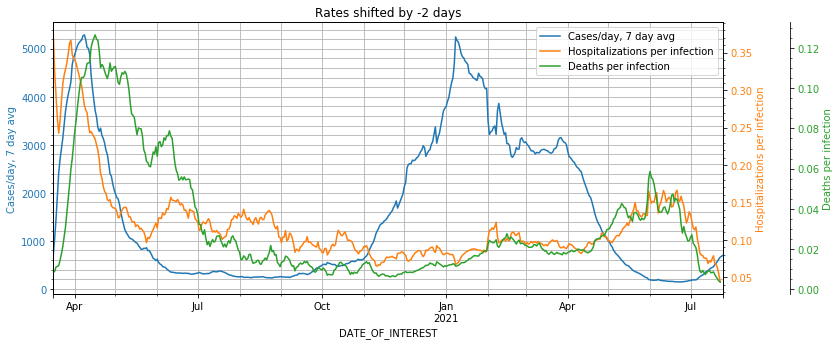

Rates shifted by -1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      496.000000   
mean            1601.712849                        0.120980   
std             1501.722421                        0.053115   
min              145.285714                        0.042629   
25%              324.571429                        0.087620   
50%              823.142857                        0.105992   
75%             2878.428571                        0.136723   
max             5290.285714                        0.350595   

       Deaths per infection  
count            496.000000  
mean               0.032479  
std                0.030594  
min                0.003570  
25%                0.012027  
50%                0.020436  
75%                0.039819  
max                0.132610

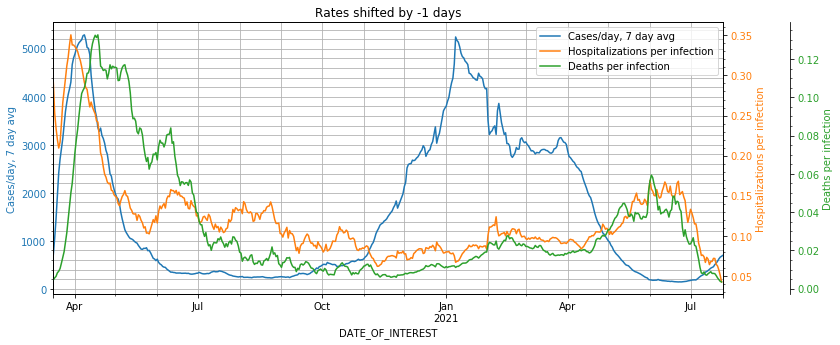

Rates shifted by 0 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.121315   
std             1501.722421                        0.052560   
min              145.285714                        0.041429   
25%              324.571429                        0.087464   
50%              823.142857                        0.108097   
75%             2878.428571                        0.138864   
max             5290.285714                        0.332272   

       Deaths per infection  
count            497.000000  
mean               0.033075  
std                0.032014  
min                0.003002  
25%                0.011640  
50%                0.021047  
75%                0.040782  
max                0.139928

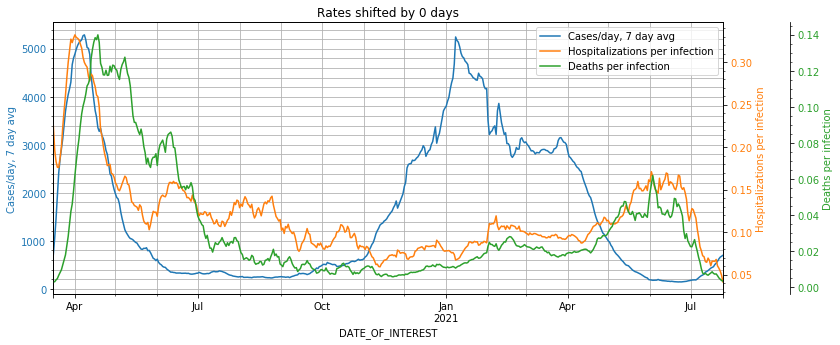

Rates shifted by 1 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.121967   
std             1501.722421                        0.053078   
min              145.285714                        0.047959   
25%              324.571429                        0.088204   
50%              823.142857                        0.109766   
75%             2878.428571                        0.140449   
max             5290.285714                        0.325587   

       Deaths per infection  
count            497.000000  
mean               0.033773  
std                0.033531  
min                0.001401  
25%                0.011378  
50%                0.021252  
75%                0.042815  
max                0.146394

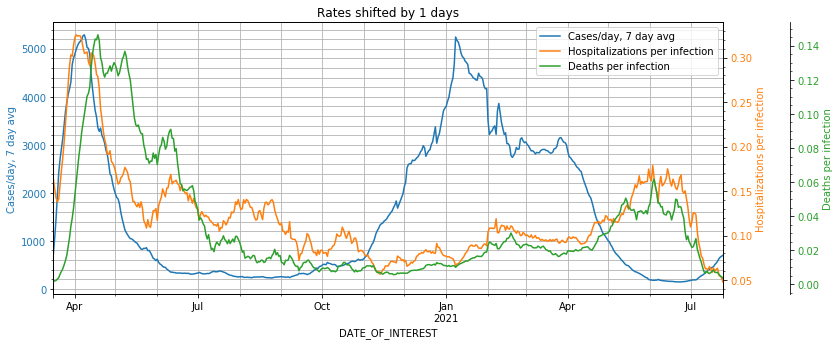

Rates shifted by 2 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.122768   
std             1501.722421                        0.054537   
min              145.285714                        0.051224   
25%              324.571429                        0.087676   
50%              823.142857                        0.111024   
75%             2878.428571                        0.140836   
max             5290.285714                        0.324896   

       Deaths per infection  
count            497.000000  
mean               0.034514  
std                0.035141  
min                0.000600  
25%                0.010975  
50%                0.021336  
75%                0.044464  
max                0.152989

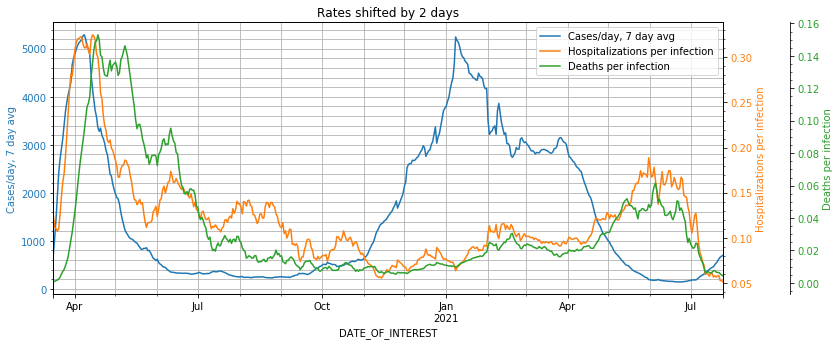

Rates shifted by 3 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.123712   
std             1501.722421                        0.056713   
min              145.285714                        0.051029   
25%              324.571429                        0.086937   
50%              823.142857                        0.110991   
75%             2878.428571                        0.143513   
max             5290.285714                        0.344955   

       Deaths per infection  
count            497.000000  
mean               0.035296  
std                0.036837  
min                0.000200  
25%                0.010760  
50%                0.021437  
75%                0.045231  
max                0.159200

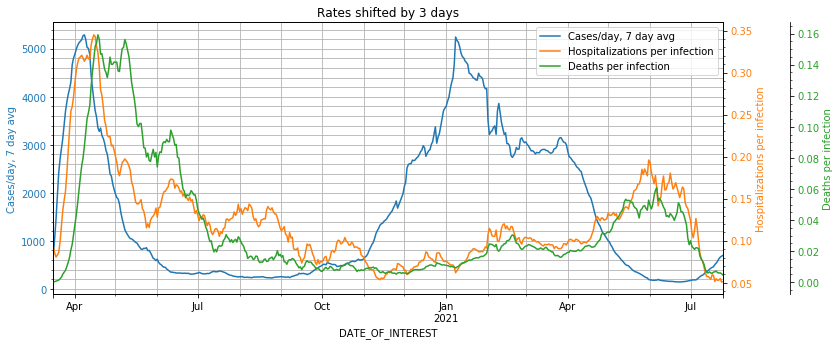

Rates shifted by 4 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.124806   
std             1501.722421                        0.059487   
min              145.285714                        0.048697   
25%              324.571429                        0.085883   
50%              823.142857                        0.111022   
75%             2878.428571                        0.146135   
max             5290.285714                        0.365420   

       Deaths per infection  
count            497.000000  
mean               0.036118  
std                0.038608  
min                0.000136  
25%                0.010589  
50%                0.021391  
75%                0.045903  
max                0.165237

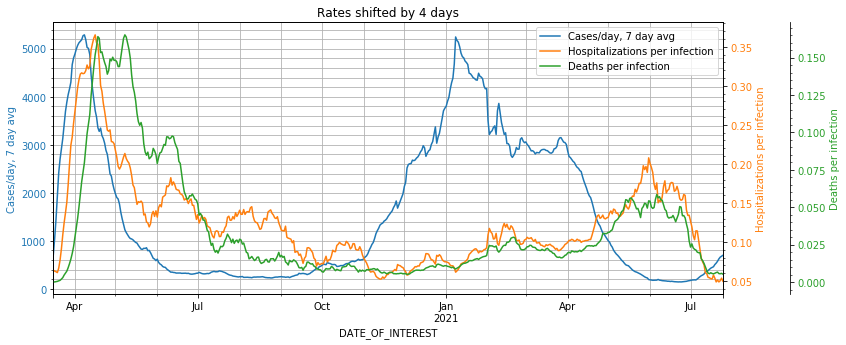

Rates shifted by 5 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.126061   
std             1501.722421                        0.062730   
min              145.285714                        0.043095   
25%              324.571429                        0.084619   
50%              823.142857                        0.110524   
75%             2878.428571                        0.150434   
max             5290.285714                        0.382695   

       Deaths per infection  
count            497.000000  
mean               0.036984  
std                0.040473  
min                0.000098  
25%                0.010481  
50%                0.021457  
75%                0.047676  
max                0.178108

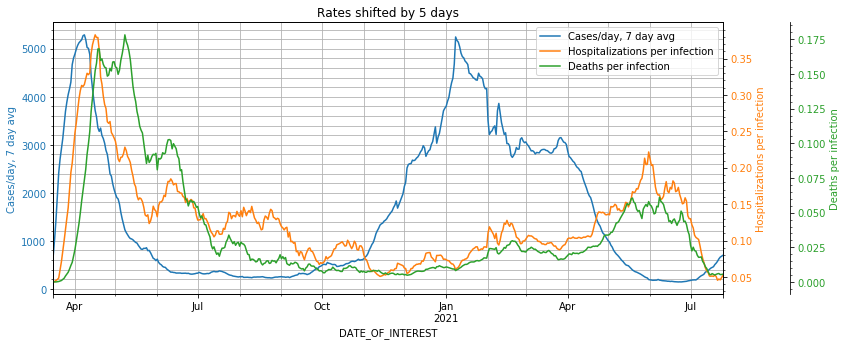

Rates shifted by 6 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.127466   
std             1501.722421                        0.066374   
min              145.285714                        0.029223   
25%              324.571429                        0.082676   
50%              823.142857                        0.110541   
75%             2878.428571                        0.153862   
max             5290.285714                        0.404084   

       Deaths per infection  
count            497.000000  
mean               0.037890  
std                0.042418  
min                0.000000  
25%                0.010439  
50%                0.021752  
75%                0.048896  
max                0.186793

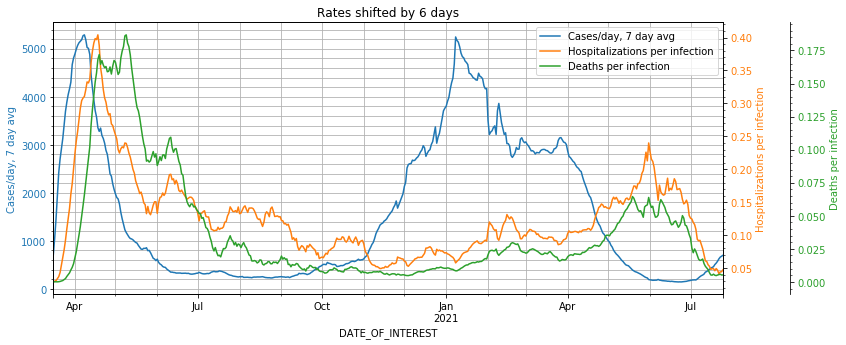

Rates shifted by 7 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.129026   
std             1501.722421                        0.070315   
min              145.285714                        0.019015   
25%              324.571429                        0.080933   
50%              823.142857                        0.112598   
75%             2878.428571                        0.158503   
max             5290.285714                        0.423187   

       Deaths per infection  
count            497.000000  
mean               0.038840  
std                0.044445  
min                0.000000  
25%                0.010187  
50%                0.021822  
75%                0.049113  
max                0.195063

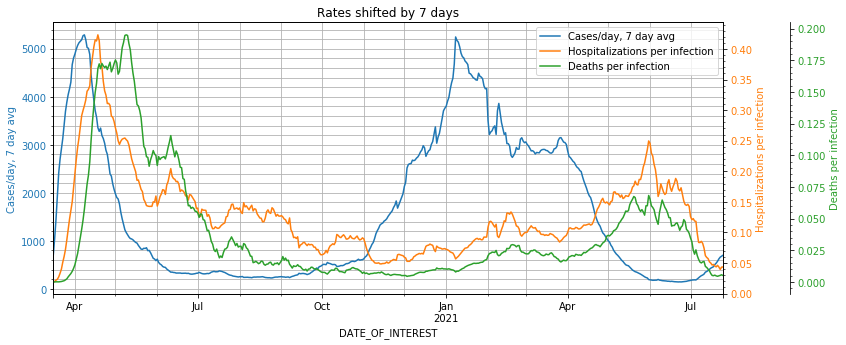

Rates shifted by 8 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.130737   
std             1501.722421                        0.074531   
min              145.285714                        0.011809   
25%              324.571429                        0.079128   
50%              823.142857                        0.115615   
75%             2878.428571                        0.161930   
max             5290.285714                        0.440630   

       Deaths per infection  
count            497.000000  
mean               0.039828  
std                0.046549  
min                0.000000  
25%                0.009933  
50%                0.022039  
75%                0.049296  
max                0.206633

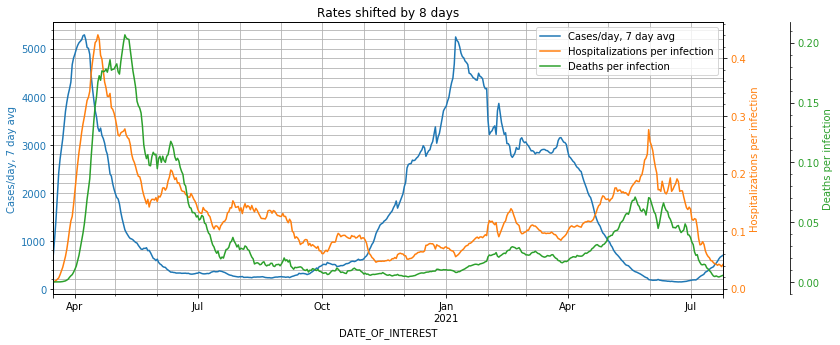

Rates shifted by 9 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.132591   
std             1501.722421                        0.078984   
min              145.285714                        0.007996   
25%              324.571429                        0.078874   
50%              823.142857                        0.115385   
75%             2878.428571                        0.166509   
max             5290.285714                        0.458839   

       Deaths per infection  
count            497.000000  
mean               0.040852  
std                0.048726  
min                0.000000  
25%                0.009777  
50%                0.022092  
75%                0.050239  
max                0.218924

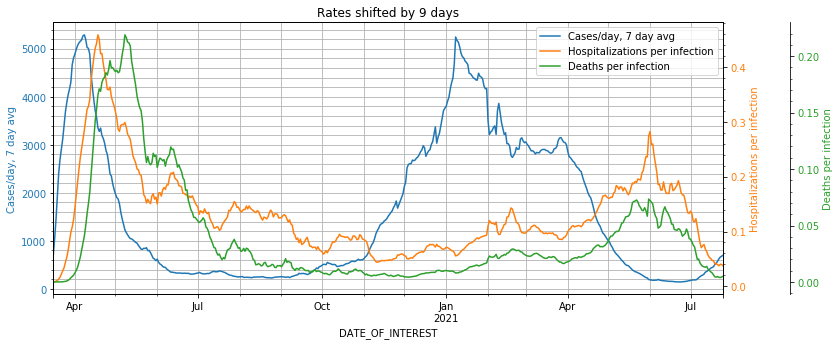

Rates shifted by 10 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.134593   
std             1501.722421                        0.083659   
min              145.285714                        0.005692   
25%              324.571429                        0.078888   
50%              823.142857                        0.115249   
75%             2878.428571                        0.169920   
max             5290.285714                        0.472325   

       Deaths per infection  
count            497.000000  
mean               0.041914  
std                0.050983  
min                0.000000  
25%                0.009677  
50%                0.022120  
75%                0.051643  
max                0.229600

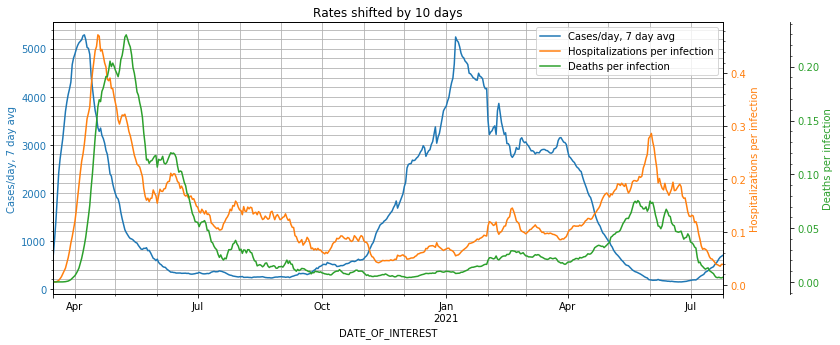

Rates shifted by 11 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.136727   
std             1501.722421                        0.088581   
min              145.285714                        0.004120   
25%              324.571429                        0.076867   
50%              823.142857                        0.117155   
75%             2878.428571                        0.177778   
max             5290.285714                        0.483516   

       Deaths per infection  
count            497.000000  
mean               0.043016  
std                0.053340  
min                0.000000  
25%                0.009388  
50%                0.022337  
75%                0.052834  
max                0.239199

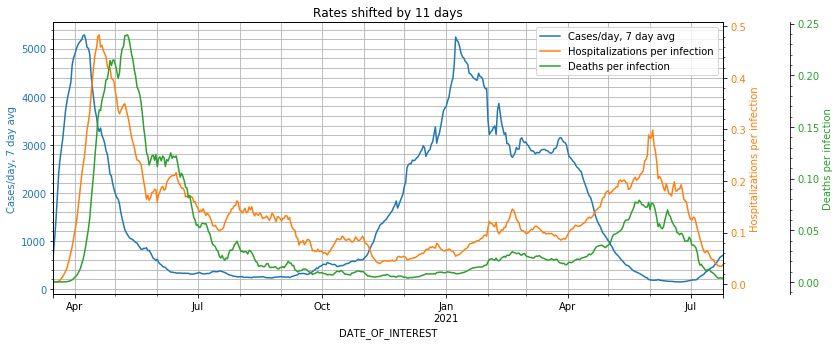

Rates shifted by 12 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.138988   
std             1501.722421                        0.093744   
min              145.285714                        0.003100   
25%              324.571429                        0.076220   
50%              823.142857                        0.116170   
75%             2878.428571                        0.181893   
max             5290.285714                        0.491616   

       Deaths per infection  
count            497.000000  
mean               0.044156  
std                0.055784  
min                0.000000  
25%                0.009062  
50%                0.022368  
75%                0.053754  
max                0.250030

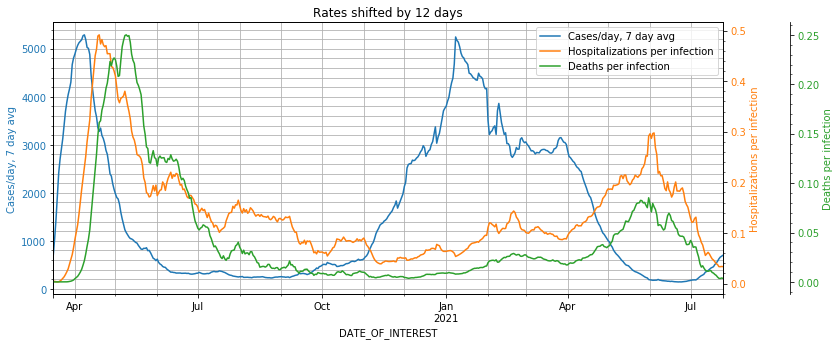

Rates shifted by 13 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.141386   
std             1501.722421                        0.099133   
min              145.285714                        0.002466   
25%              324.571429                        0.074223   
50%              823.142857                        0.117128   
75%             2878.428571                        0.184857   
max             5290.285714                        0.500893   

       Deaths per infection  
count            497.000000  
mean               0.045331  
std                0.058322  
min                0.000000  
25%                0.008816  
50%                0.022715  
75%                0.054624  
max                0.267161

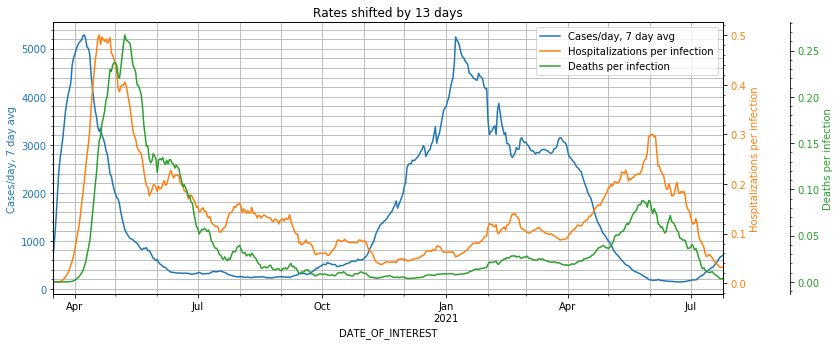

Rates shifted by 14 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.143921   
std             1501.722421                        0.104804   
min              145.285714                        0.001785   
25%              324.571429                        0.072590   
50%              823.142857                        0.117356   
75%             2878.428571                        0.186262   
max             5290.285714                        0.531270   

       Deaths per infection  
count            497.000000  
mean               0.046541  
std                0.060950  
min                0.000000  
25%                0.008670  
50%                0.022919  
75%                0.056047  
max                0.281772

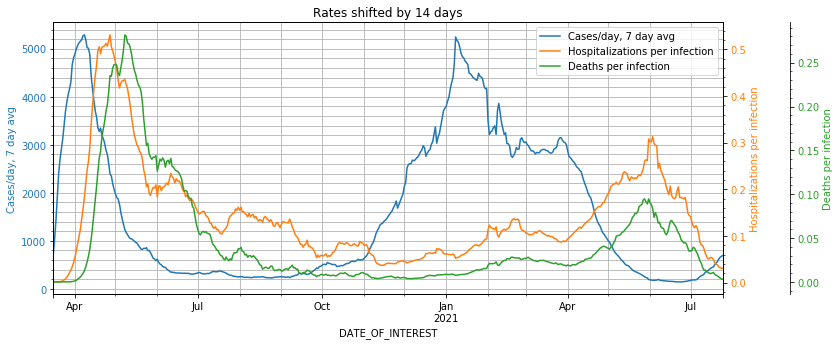

Rates shifted by 15 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.146584   
std             1501.722421                        0.110730   
min              145.285714                        0.001265   
25%              324.571429                        0.070342   
50%              823.142857                        0.117893   
75%             2878.428571                        0.193129   
max             5290.285714                        0.566267   

       Deaths per infection  
count            497.000000  
mean               0.047792  
std                0.063682  
min                0.000000  
25%                0.008497  
50%                0.023220  
75%                0.056172  
max                0.295513

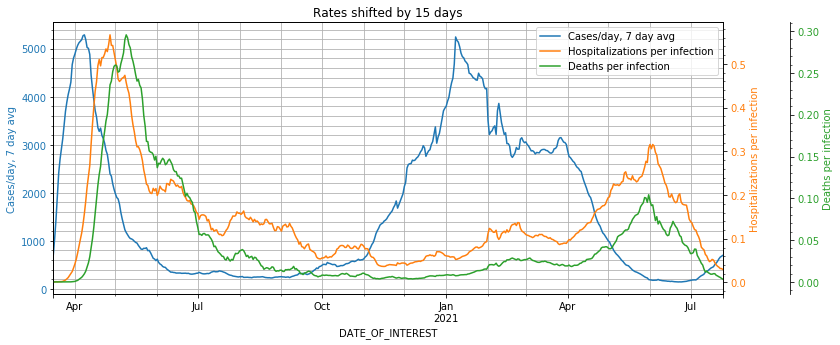

Rates shifted by 16 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      497.000000   
mean            1601.712849                        0.149402   
std             1501.722421                        0.116981   
min              145.285714                        0.000915   
25%              324.571429                        0.068666   
50%              823.142857                        0.119457   
75%             2878.428571                        0.195164   
max             5290.285714                        0.593036   

       Deaths per infection  
count            497.000000  
mean               0.049087  
std                0.066534  
min                0.000000  
25%                0.008357  
50%                0.023486  
75%                0.057912  
max                0.307868

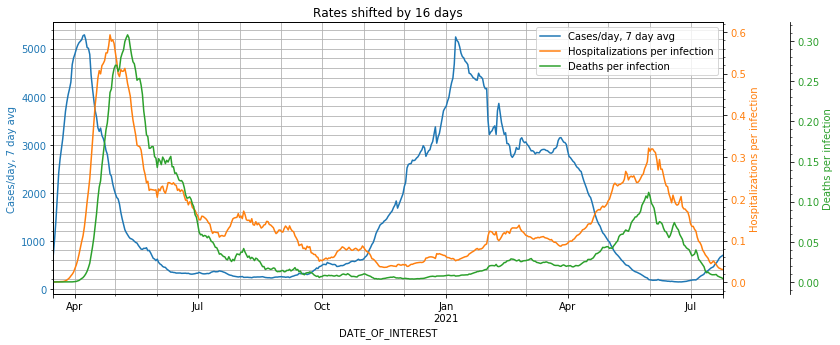

Rates shifted by 17 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      496.000000   
mean            1601.712849                        0.152658   
std             1501.722421                        0.123485   
min              145.285714                        0.000687   
25%              324.571429                        0.066108   
50%              823.142857                        0.119769   
75%             2878.428571                        0.197093   
max             5290.285714                        0.619610   

       Deaths per infection  
count            496.000000  
mean               0.050524  
std                0.069540  
min                0.000000  
25%                0.008263  
50%                0.023442  
75%                0.058306  
max                0.320834

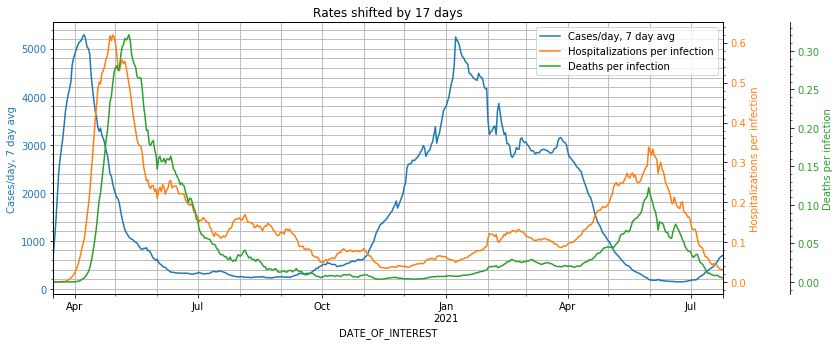

Rates shifted by 18 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      495.000000   
mean            1601.712849                        0.156067   
std             1501.722421                        0.130305   
min              145.285714                        0.000517   
25%              324.571429                        0.064620   
50%              823.142857                        0.118985   
75%             2878.428571                        0.199954   
max             5290.285714                        0.654583   

       Deaths per infection  
count            495.000000  
mean               0.052005  
std                0.072660  
min                0.000000  
25%                0.008128  
50%                0.023354  
75%                0.059552  
max                0.337430

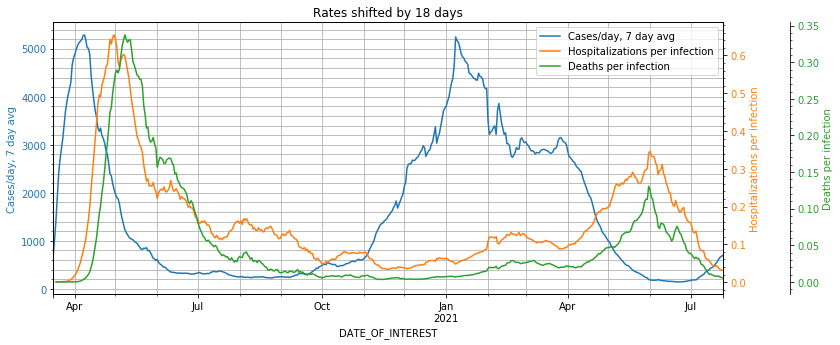

Rates shifted by 19 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      494.000000   
mean            1601.712849                        0.159631   
std             1501.722421                        0.137478   
min              145.285714                        0.000413   
25%              324.571429                        0.064753   
50%              823.142857                        0.119607   
75%             2878.428571                        0.205072   
max             5290.285714                        0.685527   

       Deaths per infection  
count            494.000000  
mean               0.053533  
std                0.075899  
min                0.000000  
25%                0.008094  
50%                0.023444  
75%                0.060024  
max                0.361433

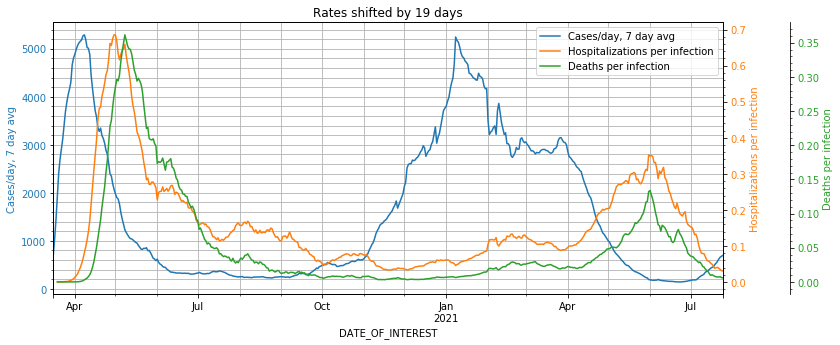

Rates shifted by 20 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      493.000000   
mean            1601.712849                        0.163354   
std             1501.722421                        0.145013   
min              145.285714                        0.000370   
25%              324.571429                        0.064936   
50%              823.142857                        0.119991   
75%             2878.428571                        0.211335   
max             5290.285714                        0.717573   

       Deaths per infection  
count            493.000000  
mean               0.055113  
std                0.079264  
min                0.000000  
25%                0.007969  
50%                0.023798  
75%                0.061281  
max                0.381378

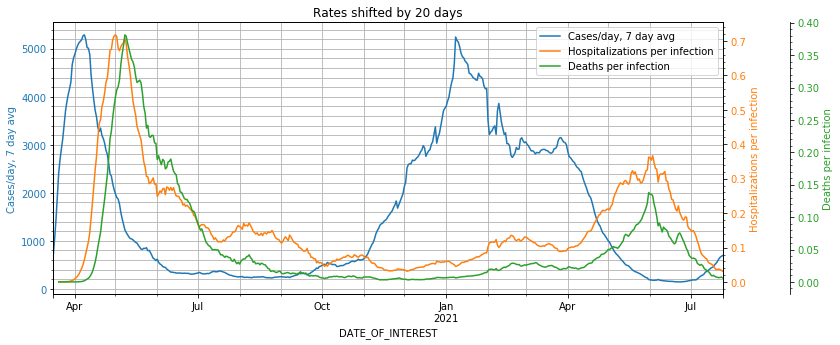

Rates shifted by 21 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      492.000000   
mean            1601.712849                        0.167233   
std             1501.722421                        0.152935   
min              145.285714                        0.000342   
25%              324.571429                        0.064347   
50%              823.142857                        0.120231   
75%             2878.428571                        0.218455   
max             5290.285714                        0.759856   

       Deaths per infection  
count            492.000000  
mean               0.056743  
std                0.082750  
min                0.000000  
25%                0.008023  
50%                0.023895  
75%                0.061858  
max                0.399976

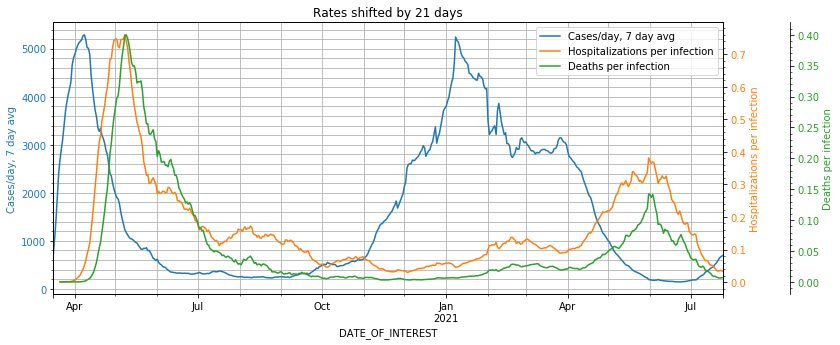

Rates shifted by 22 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      491.000000   
mean            1601.712849                        0.171283   
std             1501.722421                        0.161292   
min              145.285714                        0.000319   
25%              324.571429                        0.063614   
50%              823.142857                        0.121391   
75%             2878.428571                        0.223684   
max             5290.285714                        0.817254   

       Deaths per infection  
count            491.000000  
mean               0.058417  
std                0.086347  
min                0.000000  
25%                0.007926  
50%                0.024041  
75%                0.063099  
max                0.418460

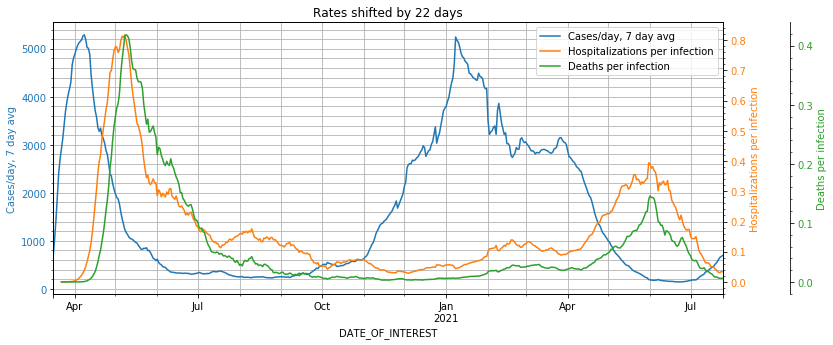

Rates shifted by 23 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      490.000000   
mean            1601.712849                        0.175479   
std             1501.722421                        0.170037   
min              145.285714                        0.000292   
25%              324.571429                        0.062087   
50%              823.142857                        0.120796   
75%             2878.428571                        0.231112   
max             5290.285714                        0.883465   

       Deaths per infection  
count            490.000000  
mean               0.060135  
std                0.090036  
min                0.000000  
25%                0.007935  
50%                0.024340  
75%                0.063976  
max                0.437310

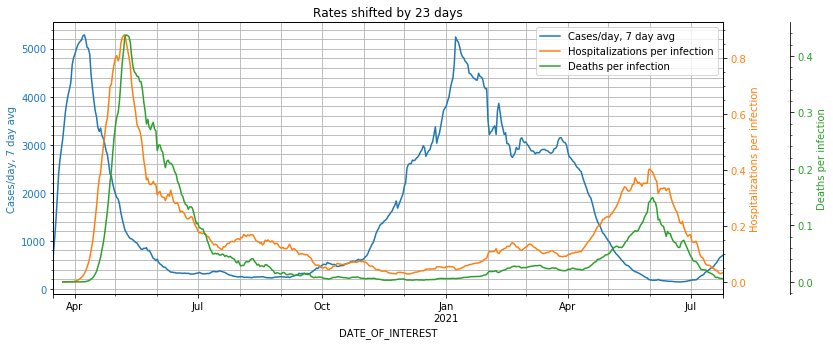

Rates shifted by 24 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      489.000000   
mean            1601.712849                        0.179847   
std             1501.722421                        0.179193   
min              145.285714                        0.000271   
25%              324.571429                        0.061188   
50%              823.142857                        0.121249   
75%             2878.428571                        0.234197   
max             5290.285714                        0.963242   

       Deaths per infection  
count            489.000000  
mean               0.061901  
std                0.093816  
min                0.000000  
25%                0.007847  
50%                0.024327  
75%                0.065784  
max                0.455594

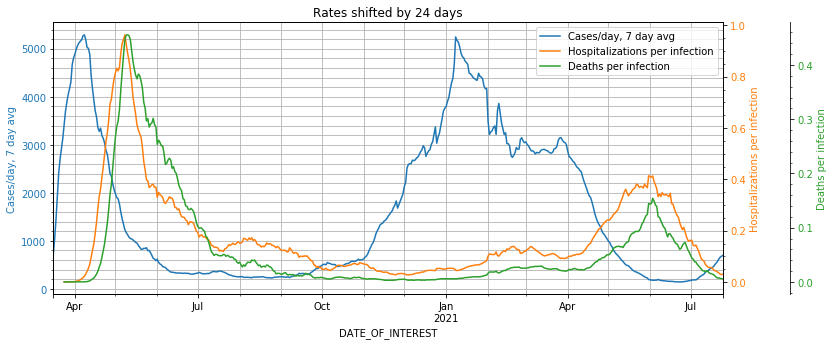

Rates shifted by 25 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      488.000000   
mean            1601.712849                        0.184389   
std             1501.722421                        0.188751   
min              145.285714                        0.000257   
25%              324.571429                        0.061057   
50%              823.142857                        0.123320   
75%             2878.428571                        0.241094   
max             5290.285714                        1.033279   

       Deaths per infection  
count            488.000000  
mean               0.063711  
std                0.097681  
min                0.000000  
25%                0.007678  
50%                0.024372  
75%                0.068403  
max                0.474782

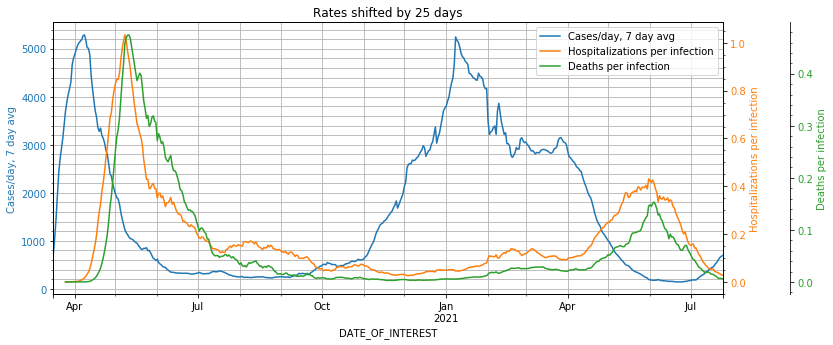

Rates shifted by 26 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      487.000000   
mean            1601.712849                        0.189105   
std             1501.722421                        0.198680   
min              145.285714                        0.000247   
25%              324.571429                        0.060274   
50%              823.142857                        0.124100   
75%             2878.428571                        0.247323   
max             5290.285714                        1.101345   

       Deaths per infection  
count            487.000000  
mean               0.065563  
std                0.101618  
min                0.000000  
25%                0.007586  
50%                0.024858  
75%                0.070300  
max                0.494059

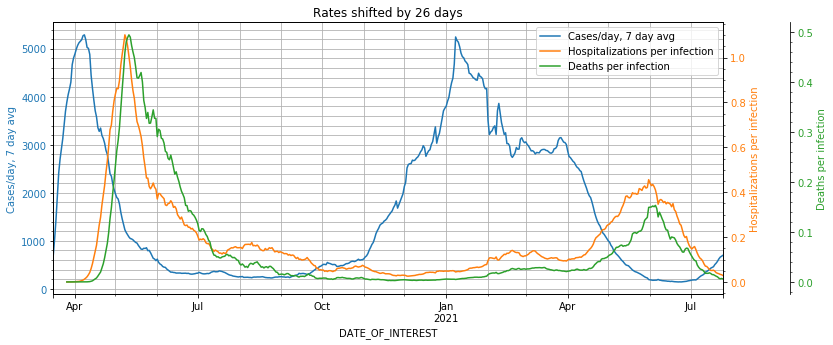

Rates shifted by 27 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      486.000000   
mean            1601.712849                        0.193991   
std             1501.722421                        0.208971   
min              145.285714                        0.000240   
25%              324.571429                        0.058805   
50%              823.142857                        0.125090   
75%             2878.428571                        0.249442   
max             5290.285714                        1.155053   

       Deaths per infection  
count            486.000000  
mean               0.067453  
std                0.105610  
min                0.000000  
25%                0.007530  
50%                0.025093  
75%                0.072425  
max                0.509324

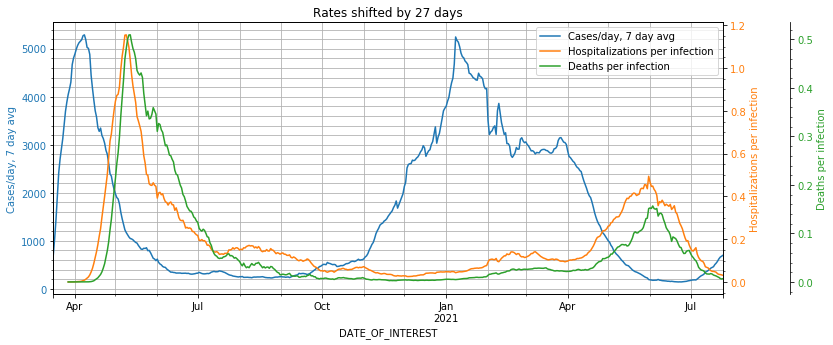

Rates shifted by 28 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      485.000000   
mean            1601.712849                        0.199033   
std             1501.722421                        0.219552   
min              145.285714                        0.000232   
25%              324.571429                        0.057600   
50%              823.142857                        0.123944   
75%             2878.428571                        0.256433   
max             5290.285714                        1.209656   

       Deaths per infection  
count            485.000000  
mean               0.069383  
std                0.109689  
min                0.000000  
25%                0.007397  
50%                0.025380  
75%                0.075182  
max                0.524840

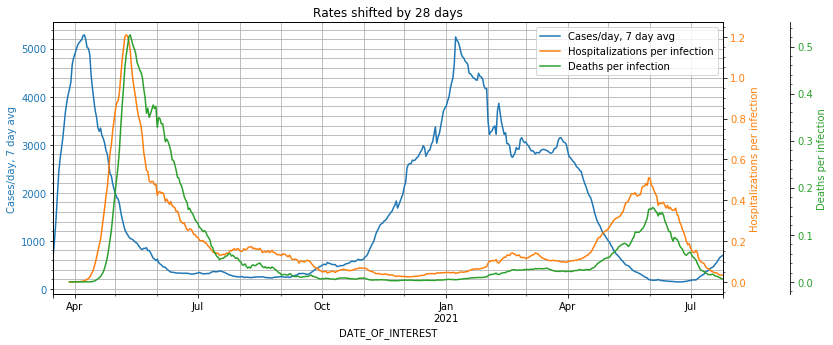

Rates shifted by 29 days


Cases/day, 7 day avg  Hospitalizations per infection  \
count            497.000000                      484.000000   
mean            1601.712849                        0.204236   
std             1501.722421                        0.230430   
min              145.285714                        0.000214   
25%              324.571429                        0.056883   
50%              823.142857                        0.127627   
75%             2878.428571                        0.260691   
max             5290.285714                        1.260231   

       Deaths per infection  
count            484.000000  
mean               0.071357  
std                0.113843  
min                0.000000  
25%                0.007430  
50%                0.025392  
75%                0.076118  
max                0.537226

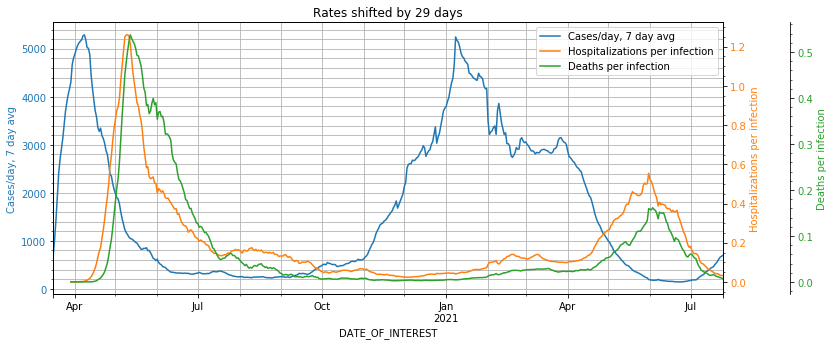

In [19]:
start = "2020/03/15"

statresults = pd.DataFrame(columns=["shift", "h/i mean", "h/i std", "d/i mean", "d/i std"])

for shift in range(-30, 30):
    dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"].shift(shift)/dat["Cases/day, 7 day avg"]
    period = dat[dat.index > start]
    u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))
    print(f"Rates shifted by {shift} days")
    stats = period[["Cases/day, 7 day avg",
                    "Hospitalizations per infection",
                    "Deaths per infection"]].describe()
    display(stats)
    plt.title(f"Rates shifted by {shift} days")
    plt.show()

# Shift analysis
Find which shifts give the min std.  That should be the right shift.

In [35]:
columns = ["Hospitalized/day, 7 day avg", "Deaths/day, 7 day avg"]
denom = "Cases/day, 7 day avg"

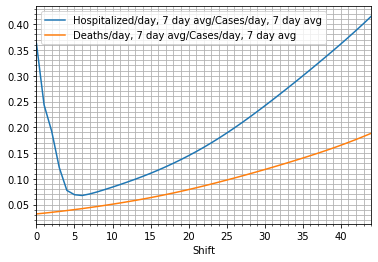

In [51]:
stddevs = u.calc_rate_std(dat, 0, 45, columns, denom)
stddevs.plot()

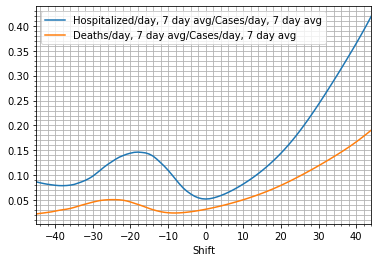

In [53]:
start = "2020/03/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

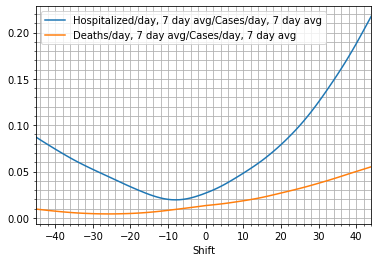

In [54]:
start = "2020/06/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

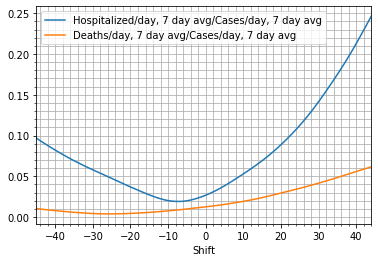

In [55]:
start = "2020/09/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

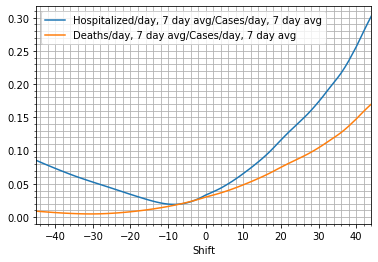

In [56]:
start = "2020/04/15"
stddevs = u.calc_rate_std(dat[dat.index > start], -45, 45, columns, denom)
stddevs.plot()

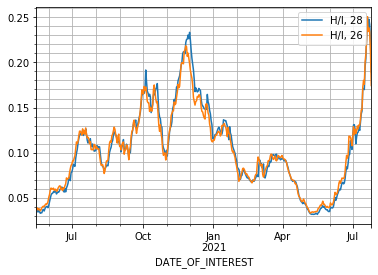

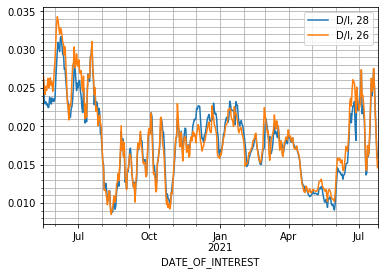

In [97]:
hcol = []
dcol = []
for shift in [28, 26]:
    hcol.append(f"H/I, {shift}")
    dcol.append(f"D/I, {shift}")
    dat[hcol[-1]] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)
    dat[dcol[-1]] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)

start = "2020/05/15"
period = dat[dat.index > start]
period[hcol].plot()
plt.show()
period[dcol].plot()

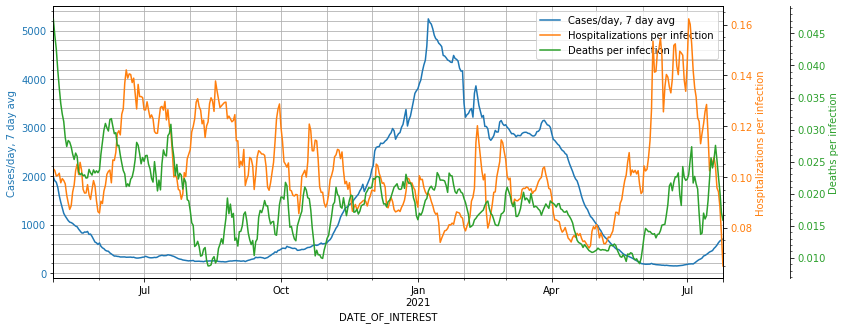

In [100]:
shift = 8
dat["Hospitalizations per infection"] = dat["Hospitalized/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)

shift = 28
dat["Deaths per infection"] = dat["Deaths/day, 7 day avg"]/dat["Cases/day, 7 day avg"].shift(shift)
start = "2020/04/30"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))

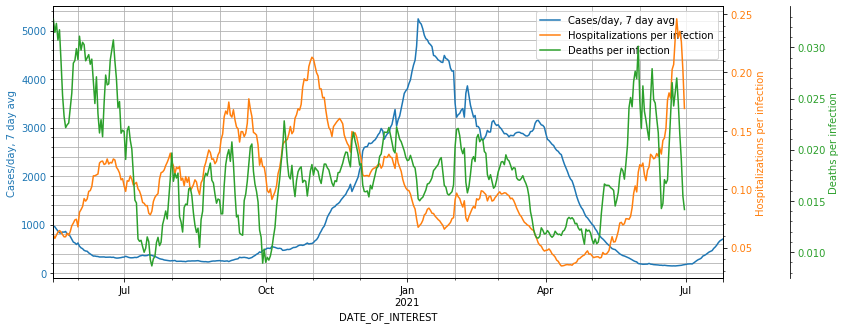

In [73]:
start = "2020/04/15"
period = dat[dat.index > start]
u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalizations per infection",
                     "Deaths per infection"]], figsize=(12, 5))